## Проект: Анализ эффективности маркетинговой кампании с использованием A/B тестирования

Вам представлены данные маркетинговой компании о рекламной деятельности, Вам необходимо будет выполненить следующие подзадачи:

**1. Подготовка данных**

* Импорт необходимых библиотек и загрузка датасета.
* Обзор датасета: получение общей информации, размера датасета, проверка наличия пропущенных значений и дубликатов.
* Обработка данных: преобразование типов данных при необходимости, удаление или заполнение пропущенных значений, удаление дубликатов.
* Преобразование категориальных признаков в числовые при необходимости.

**2. Исследовательский анализ данных (EDA)**

* Анализ распределения просмотренных объявлений.
* Анализ распределения тестовых групп.
* Изучение распределения дней и часов с наибольшим количеством рекламы.
* Вычисление и визуализация коэффициентов конверсии для тестовых групп.
* Построение тепловой карты для корреляций признаков.

**3 A/A тестирование**

* Разделим наши данные на две группы
* Проверим размеры групп
* Проведем t-тест для проверки различий между группами

**4. Полезная визуализация A/A тестирования**
* Гистограмма распределения значений в группах
* Сравнение конверсий между двуми группами
* Посмотрим на распределение по дням
* Распределение по часам

**5. Выводы и рекомендации** 

* Сделать выводы по A/А тестированию

**6. Анализ эффективности рекламы**

* Сравнение количества просмотров маркетинговых кампаний.
* Изучение процента пользователей, которые конвертировались после просмотра объявления.
* Изучение динамики конверсий в зависимости от группы (реклама или пса).

**7. Анализ времени просмотра объявлений**

* Изучение дней и часов, когда было совершено наибольшее количество конверсий.
* Оценка влияния времени дня на эффективность рекламы.

**8. Статистический анализ**

* Определение нормальности распределения конверсий в тестовых группах (Shapiro-Wilk тест).
* Тест Левена для определения равенства дисперсий.
* T-тест для сравнения средних значений конверсий в тестовых группах.
* Вычисление и сравнение процента конверсий в обеих группах.

**9. Проверка однородности дисперсии**

* Посчитать однородность дисперсии

**10. Kоэффициент конверсии**

* Посчитать коэффициент конверсии

**11. Выводы и рекомендации**

* Сделать выводы по A/B тестированию

## 1. Подготовка данных

*Импорт библиотек*

In [1691]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from pandas.errors import SettingWithCopyWarning

import warnings
from pprint import pprint
import calendar

*Глобальные настройки*

In [1692]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

*Загрузка данных*

In [1693]:
df = pd.read_csv('../datasets/marketing_AB.csv')

display(df.head(5))

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


`Unnamed: 0` - cудя по всему , в корзину<br>
`user id` - id-ник пользователя<br>
`test group` - отражает, какую рекламу смотрели пользователи (коммерческую или общественно-нравственную)<br>
`converted` - отражает факт конверсии<br>
`total ads` - общее количество просмотренных пользователем рекламных объявлений за всё время наблюдения<br>
`most ads day` - день недели, когда пользователь просмотрел больше всего рекламы<br>
`most ads hour` - час дня, в который пользователь просмотрел больше всего рекламы<br>

*Проверка данных*

In [1694]:
info_df = {}

info_df['0. Размер DataFrame'] = df.shape
info_df['1. Индексы DataFrame'] = df.index
info_df['2. Колонки DataFrame'] = list(df.columns.values)
info_df['3. Числовые колонки'] = dict(df.select_dtypes(include=[int, float, complex]).dtypes)
info_df['4. Строковые колонки'] = dict(df.select_dtypes(include=[object]).dtypes)
info_df['5. Колонки с пропусками'] = list(df.columns[df.isnull().any()])
info_df['6. Строки с пропусками'] = list(df[df.isnull().any(axis=1)].index.values)
info_df['7. Колличество строк без пропусков'] = len(df.value_counts())
info_df['8. Колличество полных дубликатов'] = df[df.duplicated(keep=False)].size
info_df['9. Колличество занимаемой памяти'] = f"{round(df.memory_usage(deep=True).sum() / 1048576, 2)} мегабайт"
info_df['Колонка: тип данных'] = dict(zip(df.columns, df.dtypes))

pprint(info_df, width=150, compact=True)
display(df.describe().T)

{'0. Размер DataFrame': (588101, 7),
 '1. Индексы DataFrame': RangeIndex(start=0, stop=588101, step=1),
 '2. Колонки DataFrame': ['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads', 'most ads day', 'most ads hour'],
 '3. Числовые колонки': {'Unnamed: 0': dtype('int64'), 'most ads hour': dtype('int64'), 'total ads': dtype('int64'), 'user id': dtype('int64')},
 '4. Строковые колонки': {'most ads day': dtype('O'), 'test group': dtype('O')},
 '5. Колонки с пропусками': [],
 '6. Строки с пропусками': [],
 '7. Колличество строк без пропусков': 588101,
 '8. Колличество полных дубликатов': 0,
 '9. Колличество занимаемой памяти': '87.57 мегабайт',
 'Колонка: тип данных': {'Unnamed: 0': dtype('int64'),
                         'converted': dtype('bool'),
                         'most ads day': dtype('O'),
                         'most ads hour': dtype('int64'),
                         'test group': dtype('O'),
                         'total ads': dtype('int64'),
                

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,588101.0,2.940500e+05,169770.279668,0.0,147025.0,294050.0,441075.0,588100.0
user id,588101.0,1.310692e+06,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
total ads,588101.0,2.482088e+01,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,1.446906e+01,4.834634,0.0,11.0,14.0,18.0,23.0


*Обработка данных*
- Преобразование данных в колонке `converted` к числовым типам
- Удаляем колонку `Unnamed: 0` - она не нужна
- Добавил новую колонку `day of week` - порядковый номер дня недели , начиная с 1 (на всякий случай)
- Добавил колонку `part day` - время дня (утро/день/вечер/ночь), может найду самое активное время в сутках

In [1695]:
df["converted"] = df['converted'].astype(int)

df.drop(columns=['Unnamed: 0'], inplace=True)

day_number = dict(((i[1], i[0]) for i in enumerate(calendar.day_name, 1)))
df['day of week'] = df['most ads day'].apply(lambda x: day_number[x])

def classify_time(hour):
    part_day = {'утро': range(5, 12), 'день': range(12, 18), 'вечер': range(18, 24), 'ночь': range(24, 5)}
    for i, v in part_day.items():
        if hour in v:
            return i
df['part day'] = df['most ads hour'].apply(classify_time)

display(df.head())


,user id,test group,converted,total ads,most ads day,most ads hour,day of week,part day
0,1069124,ad,0,130,Monday,20,1,вечер
1,1119715,ad,0,93,Tuesday,22,2,вечер
2,1144181,ad,0,21,Tuesday,18,2,вечер
3,1435133,ad,0,355,Tuesday,10,2,утро
4,1015700,ad,0,276,Friday,14,5,день


## 2. Исследовательский анализ данных (EDA)
- Распределение просмотренных объявлений
- Распределение тестовых групп
- Количеством рекламы/час
- Количеством рекламы/время дня
- Количеством рекламы/день недели
- Количеством рекламы/день недели
- Коэффициенты конверсии по тестовым группам
- Тепловая карта корреляций признаков
- Тепловая карта корреляций `converted` и `total ads`

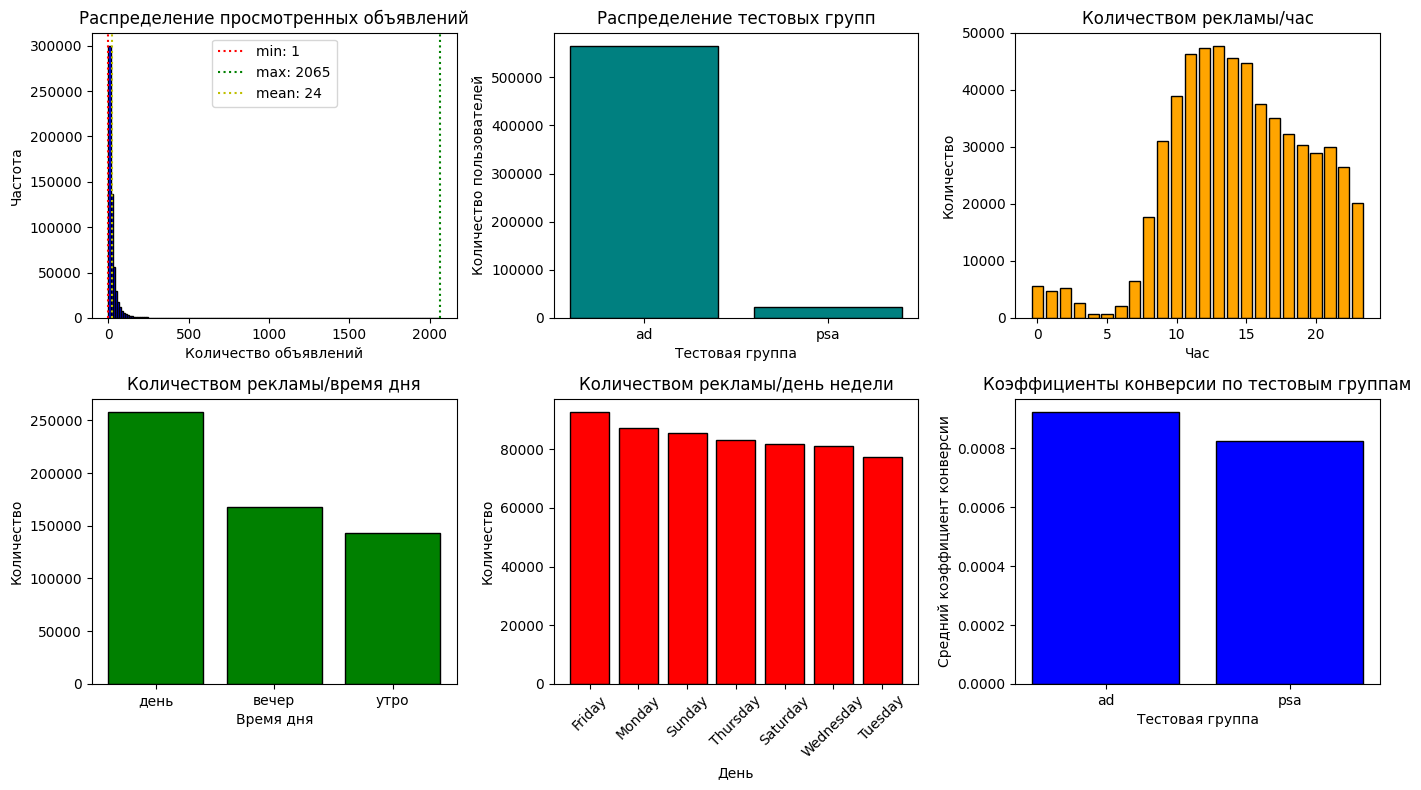

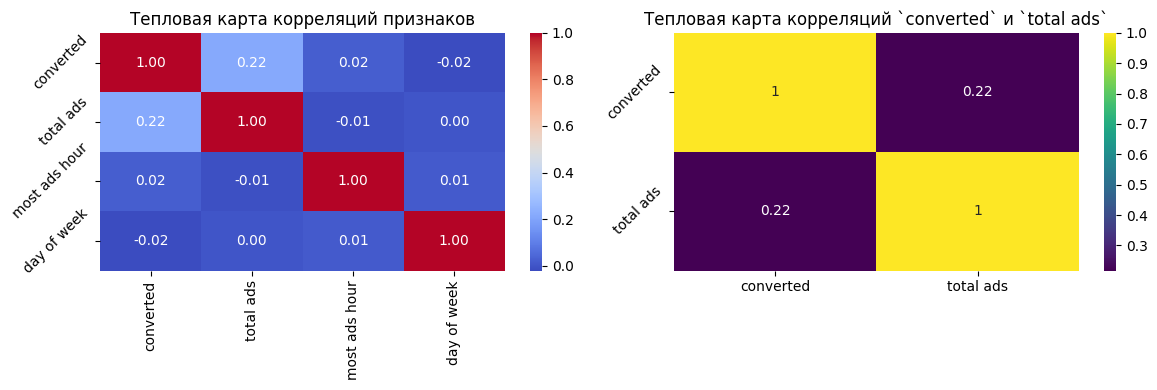

In [1696]:
fig, ax = plt.subplots(2, 3, figsize=(14, 8))

# -------------------------------------Распределение просмотренных объявлений-------------------------------------------------
min_ads = np.min(df['total ads'])
max_ads = np.max(df['total ads'])
mean_ads = int(np.mean(df['total ads']))
ax[0, 0].hist(df['total ads'], bins=160, color='blue', edgecolor='black')
ax[0, 0].set_title('Распределение просмотренных объявлений')
ax[0, 0].set_xlabel('Количество объявлений')
ax[0, 0].set_ylabel('Частота')
ax[0, 0].axvline(min_ads, color='r', linestyle=':', label=f'min: {min_ads}')
ax[0, 0].axvline(max_ads, color='g', linestyle=':', label=f'max: {max_ads}')
ax[0, 0].axvline(mean_ads, color='y', linestyle=':', label=f'mean: {mean_ads}')
ax[0, 0].legend(ncol=1, loc="upper center", frameon=True)

# ---------------------------------------Распределение тестовых групп---------------------------------------------------------
test_group_counts = df['test group'].value_counts()
ax[0, 1].bar(test_group_counts.index, test_group_counts.values, color='teal', edgecolor='black')
ax[0, 1].set_title('Распределение тестовых групп')
ax[0, 1].set_xlabel('Тестовая группа')
ax[0, 1].set_ylabel('Количество пользователей')

# ----------------------------------------Количеством рекламы/час-------------------------------------------------------------
hour_counts = df['most ads hour'].value_counts()
ax[0, 2].bar(hour_counts.index, hour_counts.values, color='orange', edgecolor='black')
ax[0, 2].set_title('Количеством рекламы/час')
ax[0, 2].set_xlabel('Час')
ax[0, 2].set_ylabel('Количество')

# ----------------------------------------Количеством рекламы/время дня-------------------------------------------------------
part_day_counts = df['part day'].value_counts()
ax[1, 0].bar(part_day_counts.index, part_day_counts.values, color='green', edgecolor='black')
ax[1, 0].set_title('Количеством рекламы/время дня')
ax[1, 0].set_xlabel('Время дня')
ax[1, 0].set_ylabel('Количество')

# ----------------------------------------Количеством рекламы/день недели-----------------------------------------------------
day_counts = df['most ads day'].value_counts()
ax[1, 1].bar(day_counts.index, day_counts.values, color='red', edgecolor='black')
ax[1, 1].set_title('Количеством рекламы/день недели')
ax[1, 1].set_xlabel('День')
ax[1, 1].set_ylabel('Количество')
ax[1, 1].set_xticklabels(day_counts.index, rotation=45)

# ---------------------------------------Коэффициенты конверсии по тестовым группам-------------------------------------------
df['conversion rate'] = df['converted'] / df['total ads']
conversion_rates = df.groupby('test group')['conversion rate'].mean()
ax[1, 2].bar(conversion_rates.index, conversion_rates.values, color='blue', edgecolor='black')
ax[1, 2].set_title('Коэффициенты конверсии по тестовым группам')
ax[1, 2].set_xlabel('Тестовая группа')
ax[1, 2].set_ylabel('Средний коэффициент конверсии')

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# -----------------------------------------Тепловая карта корреляций признаков-----------------------------------------------
df_cor = df.loc[:, ['converted', 'total ads', 'most ads hour', 'day of week']]
correlation_matrix = df_cor.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax[0])
ax[0].set_title('Тепловая карта корреляций признаков')
ax[0].tick_params(axis='y', rotation=45)

# -----------------------------------------Тепловая карта корреляций `converted` и `total ads`--------------------------------
df_cor = df.loc[:, ['converted', 'total ads']]
correlation_matrix = df_cor.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', cbar=True, ax=ax[1])
ax[1].set_title('Тепловая карта корреляций `converted` и `total ads`')
ax[1].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()


# 3. A/A тестирование

In [1697]:
ad_ads = df.loc[df['test group'] == 'ad']
ad_ads_one = ad_ads.sample(frac=0.5, random_state=30)
ad_ads_two = ad_ads.drop(ad_ads_one.index)

psa_ads = df.loc[df['test group'] == 'psa']
psa_ads_one = psa_ads.sample(frac=0.5, random_state=30)
psa_ads_two = psa_ads.drop(psa_ads_one.index)

df_AA1 = pd.concat([ad_ads_one, psa_ads_one], ignore_index=True)
df_AA2 = pd.concat([ad_ads_two, psa_ads_two ], ignore_index=True)

t_statistic, p_value = ttest_ind(df_AA1['converted'], df_AA2['converted'])

print(f'''
       Размер группы df_AA1: {df_AA1.shape}
       Размер группы df_AA2: {df_AA2.shape}
       t_statistic: {t_statistic}
       p_value: {p_value}
       ''')


       Размер группы df_AA1: (294050, 9)
       Размер группы df_AA2: (294051, 9)
       t_statistic: -0.2575119011380122
       p_value: 0.7967837193330134
       


# 4. Полезная визуализация A/A тестирования
- Гист. распределения конверсий df_AA1
- Гист. распределения конверсий df_AA2
- Сравнение конверсий между группами
- Сравнение конверсий между группами(pie)
- Распределение по дням
- Распределение по часам


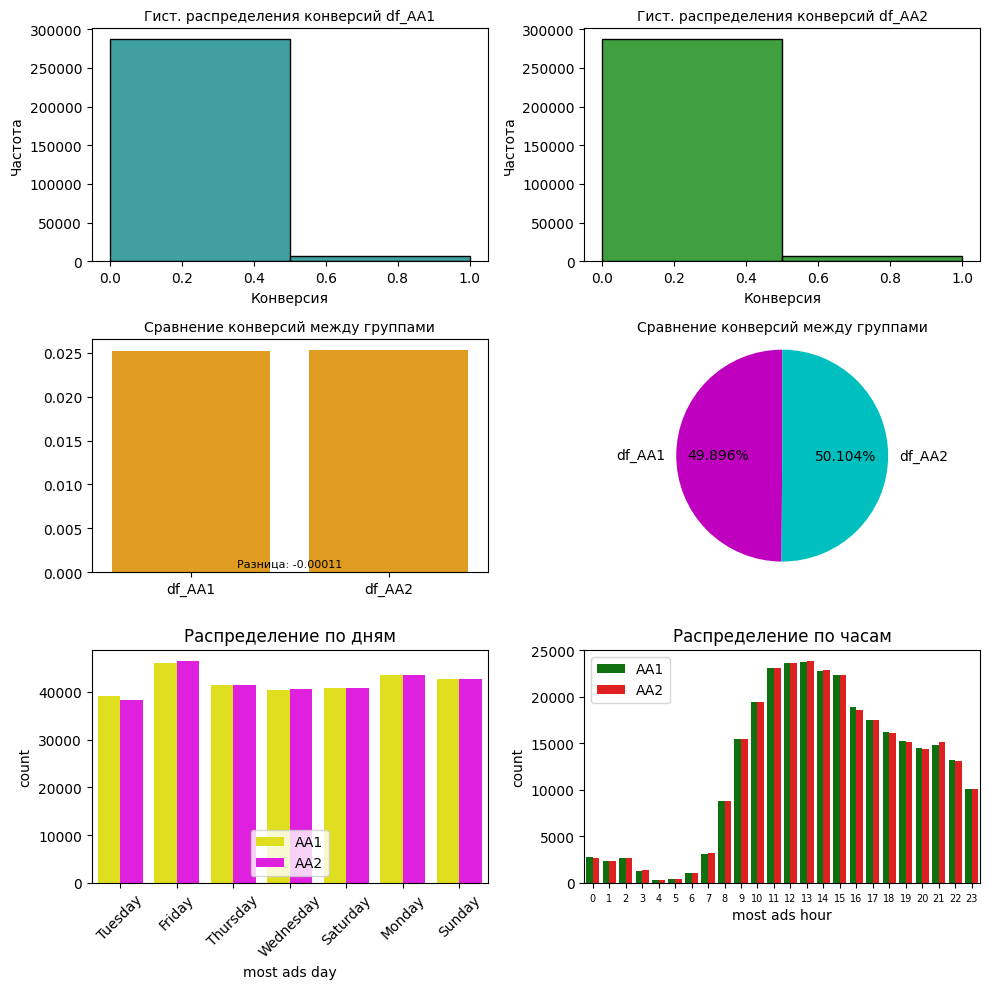

In [1698]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

df_AA1['Group'] = 'AA1'
df_AA2['Group'] = 'AA2'
combined_df = pd.concat([df_AA1, df_AA2])

# -----------------------------------Гистограмма распределения-------------------------------------------------------------------
sns.histplot(df_AA1['converted'], bins=2, ax=ax[0, 0], color='teal', kde=False)
ax[0, 0].set_title('Гист. распределения конверсий df_AA1', fontsize=10)
ax[0, 0].set_xlabel('Конверсия')
ax[0, 0].set_ylabel('Частота')

sns.histplot(df_AA2['converted'], bins=2, ax=ax[0, 1], color='green', kde=False)
ax[0, 1].set_title('Гист. распределения конверсий df_AA2', fontsize=10)
ax[0, 1].set_xlabel('Конверсия')
ax[0, 1].set_ylabel('Частота')

# -----------------------------------Сравнение конверсий между двуми группами-------------------------------------------------------------------
sns.barplot(x=['df_AA1', 'df_AA2'], y=[df_AA1['converted'].mean(), df_AA2['converted'].mean()], color='orange', ax=ax[1, 0])
ax[1, 0].set_title('Сравнение конверсий между группами', fontsize=10)
text_x = 0.5
difference = df_AA1['converted'].mean() - df_AA2['converted'].mean()
text_y = max(df_AA1['converted'].mean(), df_AA2['converted'].mean()) + 0.02
ax[1, 0].text(0.5, max(df_AA1['converted'].mean(), df_AA2['converted'].mean()) + 0.001, f'Разница: {difference:.5f}',
              horizontalalignment='center', color='black', fontsize=8, transform=ax[1, 0].transAxes)

# -----------------------------------Сравнение средних конверсий между группами-------------------------------------------------------------------
data = [df_AA1['converted'].mean(), df_AA2['converted'].mean()]
ax[1, 1].pie(data, labels=['df_AA1', 'df_AA2'], colors=['m', 'c'], autopct='%1.3f%%', startangle=90)
ax[1, 1].axis('equal')
ax[1, 1].set_title('Сравнение конверсий между группами', fontsize=10)

# -----------------------------------Посмотрим на распределение по дням-------------------------------------------------------------------
sns.countplot(data=combined_df, x='most ads day', hue='Group', palette=['yellow', 'magenta'], ax=ax[2, 0])
ax[2, 0].set_title('Распределение по дням')
ax[2, 0].tick_params(axis='x', rotation=45)
ax[2, 0].legend(ncol=1, loc="lower center", frameon=True)

# -----------------------------------Распределение по часам-------------------------------------------------------------------
sns.countplot(data=combined_df, x='most ads hour', hue='Group', palette=['green', 'red'], ax=ax[2, 1])
ax[2, 1].set_title('Распределение по часам')
ax[2, 1].tick_params(axis='x', labelsize=7)
ax[2, 1].legend(ncol=1, loc="upper left", frameon=True)


plt.tight_layout()
plt.show()

# 5. Выводы и рекомендации 

В целом А/А тест подвердил то, что наши данные корректны, **TEST - PASSED** <br>
p_value больше 0.05, что означает что статистические различия между нашими группами являются не значительными
Визуализация нам также показала что различия в группах минимальны
- p_value = 0.7967837193330134 ------------------- **PASSED**
- Гист. распределения конверсий df_AA1 ----------- **PASSED** 
- Гист. распределения конверсий df_AA2 ----------- **PASSED**
- Сравнение конверсий между группами ------------- **PASSED**
- Сравнение конверсий между группами(pie) -------- **PASSED**
- Распределение по дням -------------------------- **PASSED**
- Распределение по часам ------------------------- **PASSED**

# 6. Анализ эффективности рекламы

In [1699]:
# Сравнение количества просмотров маркетинговых кампаний
...
# plt.show()


# Изучение процента пользователей, которые конвертировались после просмотра объявления
...
# plt.show()


# Изучение динамики конверсий в зависимости от группы (реклама или пса)
...
# plt.show()

# 7. Анализ времени просмотра объявлений

In [1700]:
# Изучение дней и часов, когда было совершено наибольшее количество конверсий
...
# plt.show()

...
# plt.show()

# 8. Статистический анализ

In [1701]:
# Определение нормальности распределения конверсий в тестовых группах (Shapiro-Wilk тест)
# ...
# ad_dist.shape, psa_dist.shape

# from scipy.stats import shapiro


# T-тест для сравнения средних значений конверсий в тестовых группах
# from scipy.stats import ttest_ind
# ...

# 9. Проверка однородности дисперсии

In [1702]:
# f_stat, p_value = stats.f_oneway(group1, group2)

# 10. Коэффициент конверсии

In [1703]:
# коэффициент конверсии
# converts_psa = ...
# converts_ad = ...
# (100 * converts_psa[1]/converts_psa[0]), (100 * converts_ad[1]/converts_ad[0])

# 11. Выводы и рекомендации